In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz   
!tar -xvf spark-3.0.1-bin-hadoop2.7.tgz   
!pip install -q findspark

spark-3.0.1-bin-hadoop2.7/
spark-3.0.1-bin-hadoop2.7/RELEASE
spark-3.0.1-bin-hadoop2.7/examples/
spark-3.0.1-bin-hadoop2.7/examples/src/
spark-3.0.1-bin-hadoop2.7/examples/src/main/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/ml/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/ml/FPGrowthExample.scala
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/ml/GBTExample.scala
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/ml/ALSExample.scala
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/ml/KMeansExample.scala
spark-3.0.1-bin-hadoop2.7/example

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

import findspark
findspark.init()


In [6]:
from pyspark import SparkConf,SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import Row,SQLContext
import sys
import requests
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import json
from pyspark.sql.functions import col
from pyspark.sql.functions import split, explode, explode_outer
conf = SparkConf().setAppName("LOL games")
sc = pyspark.SparkContext(conf=conf)


#conf = SparkConf().set("spark.ui.port", "4050")
# create the context
#spark = SparkSession.builder.getOrCreate()


In [7]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# file_id = '1-C86yw9iABFuK84Ned-IbjwkfJNpq6Zi'
# downloaded = drive.CreateFile({'id':file_id})
# downloaded.FetchMetadata(fetch_all=True)
# downloaded.GetContentFile(downloaded.metadata['title'])

In [8]:
from google.colab import files
uploaded = files.upload()

Saving games1000.json to games1000.json


In [17]:
def get_stats_pick(line):
  line=json.loads(line)
  champ_names=[0]*10
  for i in range(10):
    champ_names[i]=(line["participants"][i]["championId"],1)   
  return champ_names
lines = sc.textFile("games1000.json")
total=len(lines.collect())
champion_names=lines.flatMap(lambda line:get_stats_pick(line))  
champion_names=champion_names.reduceByKey(lambda a,b:a+b)       
champion_picks=champion_names.map(lambda champ_picks:(champ_picks[0],champ_picks[1]/total))
#champion_names.collect()
champion_pick=champion_picks.collect()
champion_pick

[('Karma', 0.148),
 ('Ezreal', 0.361),
 ('Nunu & Willump', 0.039),
 ('Mordekaiser', 0.037),
 ('Aurelion Sol', 0.025),
 ('Heimerdinger', 0.057),
 ('Thresh', 0.282),
 ('Ekko', 0.15),
 ('Corki', 0.078),
 ('Miss Fortune', 0.16),
 ('Katarina', 0.078),
 ('Jayce', 0.13),
 ('Zoe', 0.084),
 ('Yasuo', 0.126),
 ('Soraka', 0.049),
 ('Teemo', 0.007),
 ('Elise', 0.159),
 ("Kai'Sa", 0.118),
 ('Aphelios', 0.253),
 ('Syndra', 0.215),
 ('Olaf', 0.044),
 ('Lulu', 0.201),
 ('Caitlyn', 0.067),
 ('Trundle', 0.066),
 ('Fiora', 0.064),
 ('Morgana', 0.075),
 ('Kindred', 0.046),
 ('Volibear', 0.02),
 ('Cassiopeia', 0.057),
 ('Pyke', 0.135),
 ('Shaco', 0.069),
 ('Darius', 0.051),
 ('Zyra', 0.012),
 ('Bard', 0.148),
 ('Rengar', 0.085),
 ('LeBlanc', 0.112),
 ('Akali', 0.11),
 ('Lucian', 0.188),
 ('Taric', 0.041),
 ('Braum', 0.046),
 ('Sett', 0.19),
 ('Senna', 0.108),
 ('Leona', 0.064),
 ('Riven', 0.119),
 ('Diana', 0.041),
 ('Evelynn', 0.044),
 ('Xayah', 0.063),
 ('Master Yi', 0.03),
 ('Kennen', 0.02),
 ('Swain', 

In [18]:
def get_stats_ban(line):
  line=json.loads(line)
  champ_names=[0]*10
  index=0
  for i in range(2):
    for j in range(5):
      champ_names[index]=(line["teams"][i]["bans"][j]["championId"],1)
      index+=1   
  return champ_names
champion_names=lines.flatMap(lambda line:get_stats_ban(line))  
#print(champion_names.collect())
champion_names=champion_names.reduceByKey(lambda a,b:a+b)       
champion_bans=champion_names.map(lambda champ_bans:(champ_bans[0],champ_bans[1]/total))
#champion_names.collect()
champ_ban=champion_bans.collect()

In [19]:
def get_stats_win(line):
  line=json.loads(line)
  champ_names=[0]*10
  for i in range(10):
    if line["participants"][i]["stats"]["win"]==True:
      champ_names[i]=(line["participants"][i]["championId"],(1,0))
    else:
      champ_names[i]=(line["participants"][i]["championId"],(0,1))       
  return champ_names
champion_names=lines.flatMap(lambda line:get_stats_win(line))  # ((a,b),(c,d))
#print(champion_names.collect())
champion_names=champion_names.reduceByKey(lambda t1,t2:(t1[0]+t2[0],t1[1]+t2[1]))       
champion_wins=champion_names.map(lambda champ_wins:(champ_wins[0],champ_wins[1][0]/(champ_wins[1][0]+champ_wins[1][1])))
#champion_names.collect()
champ_win=champion_wins.collect()

In [20]:
import itertools

In [21]:
def get_stats_synergies(line):
  line=json.loads(line)
  losser_champ_keys_vals=[]
  winner_champ_keys_vals=[]
  winner_champ_names=[0]*5
  losser_champ_names=[0]*5
  if line["teams"][0]["win"]=="Win" :
    for i in range(5):
      winner_champ_names[i]=line["participants"][i]["championId"]
      losser_champ_names[i]=line["participants"][i+5]["championId"]
  else:
    for i in range(5):
      winner_champ_names[i]=line["participants"][i+5]["championId"]
      losser_champ_names[i]=line["participants"][i]["championId"]

  winner_champ_keys=list(itertools.combinations(winner_champ_names, 2))
  winner_champ_keys = [tuple(sorted(i)) for i in winner_champ_keys]
  for t in winner_champ_keys:
    winner_champ_keys_vals.append((t,(1,0)))
  losser_champ_keys=list(itertools.combinations(losser_champ_names, 2))
  losser_champ_keys = [tuple(sorted(i)) for i in losser_champ_keys]
  for t in losser_champ_keys:
    losser_champ_keys_vals.append((t,(0,1)))
  champ_names=winner_champ_keys_vals+losser_champ_keys_vals
  return champ_names
champion_names=lines.flatMap(lambda line:get_stats_synergies(line))
#print(champion_names.collect())
champion_names=champion_names.reduceByKey(lambda t1,t2:(t1[0]+t2[0],t1[1]+t2[1]))       
champion_wins_synergies=champion_names.map(lambda champ_wins:(champ_wins[0],champ_wins[1][0]/(champ_wins[1][0]+champ_wins[1][1])))
#champion_names.collect()
champ_win_synergy=champion_wins_synergies.collect()
champ_win_synergy

[(('Heimerdinger', 'Thresh'), 0.5),
 (('Ekko', 'Heimerdinger'), 1.0),
 (('Pantheon', 'Renekton'), 1.0),
 (('Ekko', 'Thresh'), 0.43478260869565216),
 (('Ezreal', 'Karma'), 0.358974358974359),
 (('Karma', 'Nunu & Willump'), 0.3333333333333333),
 (('Karma', 'Mordekaiser'), 0.0),
 (('Aurelion Sol', 'Karma'), 0.0),
 (('Ezreal', 'Nunu & Willump'), 0.6923076923076923),
 (('Ezreal', 'Mordekaiser'), 0.5714285714285714),
 (('Aurelion Sol', 'Ezreal'), 0.0),
 (('Mordekaiser', 'Nunu & Willump'), 0.0),
 (('Aurelion Sol', 'Nunu & Willump'), 0.0),
 (('Aurelion Sol', 'Mordekaiser'), 0.0),
 (('Karma', 'Katarina'), 0.8333333333333334),
 (('Heimerdinger', 'Karma'), 1.0),
 (('Jayce', 'Karma'), 0.75),
 (('Heimerdinger', 'Katarina'), 1.0),
 (('Jayce', 'Katarina'), 0.7142857142857143),
 (('Heimerdinger', 'Jayce'), 0.1111111111111111),
 (('Corki', 'Nunu & Willump'), 0.5),
 (('Miss Fortune', 'Nunu & Willump'), 0.0),
 (('Nunu & Willump', 'Thresh'), 0.0),
 (('Corki', 'Miss Fortune'), 0.6666666666666666),
 (('Cork

In [38]:
def get_stats_item_winrate(line):
  line=json.loads(line)
  winner_items_names=['0']*30
  losser_items_names=['0']*30
  if line["teams"][0]["win"]=="Win" :
    index=0
    for i in range(5):
        for j in range(0,6):
          try:
            if line["participants"][i]["stats"]["item"+str(j)]["into"]==[]:
              winner_items_names[index]=(line["participants"][i]["stats"]["item"+str(j)]["name"],(1,0))
            else:
              winner_items_names[index]=("No item",(1,0))
          except:
            winner_items_names[index]=("No item",(1,0))
            pass
          try:
            if line["participants"][i+5]["stats"]["item"+str(j)]["into"]==[]:
              losser_items_names[index]=(line["participants"][i+5]["stats"]["item"+str(j)]["name"],(0,1))
            else:
              losser_items_names[index]=("No item",(0,1))
          except:
            losser_items_names[index]=("No item",(1,0))
            pass
          index+=1
  else:
    index=0
    for i in range(5):
        for j in range(0,6):
          try:
            if line["participants"][i+5]["stats"]["item"+str(j)]["into"]==[]:
              winner_items_names[index]=(line["participants"][i+5]["stats"]["item"+str(j)]["name"],(1,0))
            else:
              winner_items_names[index]=("No item",(1,0))
          except:
            winner_items_names[index]=("No item",(1,0))
            pass
          try:
            if line["participants"][i]["stats"]["item"+str(j)]["into"]==[]:
              losser_items_names[index]=(line["participants"][i]["stats"]["item"+str(j)]["name"],(0,1))
            else:
              losser_items_names[index]=("No item",(0,1))
          except:
            losser_items_names[index]=("No item",(1,0))
            pass
          index+=1
  item_names=winner_items_names+losser_items_names
  return item_names
champion_names=lines.flatMap(lambda line:get_stats_item_winrate(line))
#print(champion_names.collect())
champion_names=champion_names.reduceByKey(lambda t1,t2:(t1[0]+t2[0],t1[1]+t2[1]))       
item_wins=champion_names.map(lambda champ_wins:(champ_wins[0],champ_wins[1][0]/(champ_wins[1][0]+champ_wins[1][1])))
#champion_names.collect()
item_win=item_wins.collect()
item_win

[('No item', 0.589701055306533),
 ('Morellonomicon', 0.5552099533437014),
 ('Bulwark of the Mountain', 0.5169491525423728),
 ('Control Ward', 0.44511070110701106),
 ('Enchantment: Runic Echoes', 0.4597014925373134),
 ('Lich Bane', 0.6089385474860335),
 ('Corrupting Potion', 0.45975609756097563),
 ('Maw of Malmortius', 0.6146788990825688),
 ('Shard of True Ice', 0.525233644859813),
 ('Ardent Censer', 0.5176470588235295),
 ('Spirit Visage', 0.5514018691588785),
 ("Doran's Shield", 0.46153846153846156),
 ('Hextech Gunblade', 0.5789473684210527),
 ('Thornmail', 0.6024844720496895),
 ('Essence Reaver', 0.5116772823779193),
 ("Shurelya's Reverie", 0.6335403726708074),
 ("Banshee's Veil", 0.6458333333333334),
 ("Guinsoo's Rageblade", 0.49473684210526314),
 ("Nashor's Tooth", 0.48186528497409326),
 ('Sanguine Blade', 0.5925925925925926),
 ('Frozen Mallet', 0.42857142857142855),
 ("Mejai's Soulstealer", 0.7727272727272727),
 ('Boots of Mobility', 0.49165596919127086),
 ("Runaan's Hurricane", 0.

In [46]:
def get_stats_item_pickrate(line):
  line=json.loads(line)
  winner_items_names=['0']*30
  losser_items_names=['0']*30
  if line["teams"][0]["win"]=="Win" :
    index=0
    for i in range(5):
        for j in range(0,6):
          try:
            if line["participants"][i]["stats"]["item"+str(j)]["into"]==[]:
              winner_items_names[index]=(line["participants"][i]["stats"]["item"+str(j)]["name"],(1,0))
            else:
              winner_items_names[index]=("No item",(1,0))
          except:
            winner_items_names[index]=("No item",(1,0))
            pass
          try:
            if line["participants"][i+5]["stats"]["item"+str(j)]["into"]==[]:
              losser_items_names[index]=(line["participants"][i+5]["stats"]["item"+str(j)]["name"],(0,1))
            else:
              losser_items_names[index]=("No item",(0,1))
          except:
            losser_items_names[index]=("No item",(1,0))
            pass
          index+=1
  else:
    index=0
    for i in range(5):
        for j in range(0,6):
          try:
            if line["participants"][i+5]["stats"]["item"+str(j)]["into"]==[]:
              winner_items_names[index]=(line["participants"][i+5]["stats"]["item"+str(j)]["name"],(1,0))
            else:
              winner_items_names[index]=("No item",(1,0))
          except:
            winner_items_names[index]=("No item",(1,0))
            pass
          try:
            if line["participants"][i]["stats"]["item"+str(j)]["into"]==[]:
              losser_items_names[index]=(line["participants"][i]["stats"]["item"+str(j)]["name"],(0,1))
            else:
              losser_items_names[index]=("No item",(0,1))
          except:
            losser_items_names[index]=("No item",(1,0))
            pass
          index+=1
  item_names=winner_items_names+losser_items_names
  return item_names
number_of_players=10
total_items=total * number_of_players
champion_names=lines.flatMap(lambda line:get_stats_item_pickrate(line))
#print(champion_names.collect())
champion_names=champion_names.reduceByKey(lambda t1,t2:(t1[0]+t2[0],t1[1]+t2[1]))       
item_picks=champion_names.map(lambda champ_wins:(champ_wins[0],(champ_wins[1][0]+champ_wins[1][1])/total_items))
#champion_names.collect()
item_pick_rate=item_picks.collect()
item_pick_rate

[('No item', 2.8333),
 ('Morellonomicon', 0.0643),
 ('Bulwark of the Mountain', 0.0472),
 ('Control Ward', 0.2168),
 ('Enchantment: Runic Echoes', 0.067),
 ('Lich Bane', 0.0179),
 ('Corrupting Potion', 0.082),
 ('Maw of Malmortius', 0.0109),
 ('Shard of True Ice', 0.0535),
 ('Ardent Censer', 0.0425),
 ('Spirit Visage', 0.0214),
 ("Doran's Shield", 0.0637),
 ('Hextech Gunblade', 0.0209),
 ('Thornmail', 0.0161),
 ('Essence Reaver', 0.0471),
 ("Shurelya's Reverie", 0.0161),
 ("Banshee's Veil", 0.0144),
 ("Guinsoo's Rageblade", 0.0285),
 ("Nashor's Tooth", 0.0193),
 ('Sanguine Blade', 0.0108),
 ('Frozen Mallet', 0.0021),
 ("Mejai's Soulstealer", 0.0176),
 ('Boots of Mobility', 0.0779),
 ("Runaan's Hurricane", 0.0329),
 ('Frozen Heart', 0.0057),
 ("Mikael's Crucible", 0.0103),
 ('Righteous Glory', 0.0099),
 ('Umbral Glaive', 0.0479),
 ("Doran's Ring", 0.062),
 ("Zhonya's Paradox", 0.0011),
 ("Randuin's Omen", 0.0068),
 ('Enchantment: Bloodrazor', 0.0039),
 ('Harrowing Crescent', 0.0008),
 (

In [49]:
def get_stats_item_synergies_champ(line):
  line=json.loads(line)
  winner_item_champ_pairs=['0']*30
  losser_item_champ_pairs=['0']*30
  winner_items_names=['0']*30
  losser_items_names=['0']*30
  winner_champs=['0']*5
  losser_champs=['0']*5
  if line["teams"][0]["win"]=="Win" :
    index=0
    for i in range(5):
        for j in range(0,6):
          try:
            if line["participants"][i]["stats"]["item"+str(j)]["into"]==[]:
              winner_items_names[index]=line["participants"][i]["stats"]["item"+str(j)]["name"]
            else:
              winner_items_names[index]="No item"
            winner_champs[i]=line["participants"][i]["championId"]
          except:
            winner_items_names[index]="No item"
            pass
          finally:
            winner_item_champ_pairs[index]=((winner_champs[i],winner_items_names[index]),(1,0))
          try:
            if line["participants"][i+5]["stats"]["item"+str(j)]["into"]==[]:
              losser_items_names[index]=line["participants"][i+5]["stats"]["item"+str(j)]["name"]
            else:
              losser_items_names[index]="No item"
            losser_champs[i]=line["participants"][i+5]["championId"]
          except:
            losser_items_names[index]="No item"
            pass
          finally:
            losser_item_champ_pairs[index]=((losser_champs[i],losser_items_names[index]),(0,1))
          index+=1
  else:
    index=0
    for i in range(5):
        for j in range(0,6):
          try:
            if line["participants"][i+5]["stats"]["item"+str(j)]["into"]==[]:
              winner_items_names[index]=line["participants"][i+5]["stats"]["item"+str(j)]["name"]
            else:
              winner_items_names[index]="No item"
            winner_champs[i]=line["participants"][i+5]["championId"]
          except:
            winner_items_names[index]="No item"
            pass
          finally:
            winner_item_champ_pairs[index]=((winner_champs[i],winner_items_names[index]),(1,0))
          try:
            if line["participants"][i]["stats"]["item"+str(j)]["into"]==[]:
              losser_items_names[index]=line["participants"][i]["stats"]["item"+str(j)]["name"]
            else:
              losser_items_names[index]="No item"
            losser_champs[i]=line["participants"][i]["championId"]
          except:
            losser_items_names[index]="No item"
            pass
          finally:
            losser_item_champ_pairs[index]=((losser_champs[i],losser_items_names[index]),(0,1))  
          index+=1
  item_champ_pairs=winner_item_champ_pairs+losser_item_champ_pairs
  return item_champ_pairs
number_of_players=10
total_items=total * number_of_players
champion_names=lines.flatMap(lambda line:get_stats_item_synergies_champ(line))
#print(champion_names.collect())
champion_names=champion_names.reduceByKey(lambda t1,t2:(t1[0]+t2[0],t1[1]+t2[1]))       
item_champ_synergy=champion_names.map(lambda champ_wins:(champ_wins[0],champ_wins[1][0]/(champ_wins[1][0]+champ_wins[1][1])))
#champion_names.collect()
item_champ_synergyy=item_champ_synergy.collect()
item_champ_synergyy

[(('Heimerdinger', 'No item'), 0.5194174757281553),
 (('Heimerdinger', 'Morellonomicon'), 0.9333333333333333),
 (('Renekton', "Mercury's Treads"), 0.6458333333333334),
 (('Thresh', 'Bulwark of the Mountain'), 1.0),
 (('Thresh', 'No item'), 0.4944356120826709),
 (('Thresh', 'Control Ward'), 0.3719512195121951),
 (('Ekko', 'Enchantment: Runic Echoes'), 0.37755102040816324),
 (('Ekko', 'Control Ward'), 0.6666666666666666),
 (('Ekko', 'No item'), 0.4403183023872679),
 (('Ekko', 'Lich Bane'), 0.6296296296296297),
 (('Pantheon', "Mercury's Treads"), 0.5),
 (('Pantheon', 'Edge of Night'), 0.3333333333333333),
 (('Karma', 'Shard of True Ice'), 0.3614457831325301),
 (('Karma', 'Ardent Censer'), 0.39705882352941174),
 (('Karma', 'No item'), 0.35240963855421686),
 (('Ezreal', 'No item'), 0.564240790655885),
 (('Nunu & Willump', 'Spirit Visage'), 0.16666666666666666),
 (('Nunu & Willump', 'No item'), 0.47115384615384615),
 (('Nunu & Willump', 'Control Ward'), 0.09090909090909091),
 (('Mordekaiser'

In [25]:
from google.colab import files
uploaded = files.upload()

Saving champion_class.json to champion_class.json


In [26]:
f = open('champion_class.json',)
champ_class_dictionary={}
data = json.load(f) 
for champ in data:
  champ_name=champ['championId']
  champ_class=champ['tags'][0]
  champ_class_dictionary[champ_name]=champ_class
champ_class_dictionary

{'Aatrox': 'Fighter',
 'Ahri': 'Mage',
 'Akali': 'Assassin',
 'Alistar': 'Tank',
 'Amumu': 'Tank',
 'Anivia': 'Mage',
 'Annie': 'Mage',
 'Aphelios': 'Marksman',
 'Ashe': 'Marksman',
 'AurelionSol': 'Mage',
 'Azir': 'Mage',
 'Bard': 'Support',
 'Blitzcrank': 'Tank',
 'Brand': 'Mage',
 'Braum': 'Support',
 'Caitlyn': 'Marksman',
 'Camille': 'Fighter',
 'Cassiopeia': 'Mage',
 'Chogath': 'Tank',
 'Corki': 'Marksman',
 'Darius': 'Fighter',
 'Diana': 'Fighter',
 'DrMundo': 'Fighter',
 'Draven': 'Marksman',
 'Ekko': 'Assassin',
 'Elise': 'Mage',
 'Evelynn': 'Assassin',
 'Ezreal': 'Marksman',
 'Fiddlesticks': 'Mage',
 'Fiora': 'Fighter',
 'Fizz': 'Assassin',
 'Galio': 'Tank',
 'Gangplank': 'Fighter',
 'Garen': 'Fighter',
 'Gnar': 'Fighter',
 'Gragas': 'Fighter',
 'Graves': 'Marksman',
 'Hecarim': 'Fighter',
 'Heimerdinger': 'Mage',
 'Illaoi': 'Fighter',
 'Irelia': 'Fighter',
 'Ivern': 'Support',
 'Janna': 'Support',
 'JarvanIV': 'Tank',
 'Jax': 'Fighter',
 'Jayce': 'Fighter',
 'Jhin': 'Marksma

In [53]:
def get_champion_class(champ_name):
  return champ_class_dictionary[champ_name]
def get_stats_item_synergies_class(line):
  line=json.loads(line)
  winner_item_champ_pairs=['0']*30
  losser_item_champ_pairs=['0']*30
  winner_items_names=['0']*30
  losser_items_names=['0']*30
  winner_champs=['0']*5
  losser_champs=['0']*5
  if line["teams"][0]["win"]=="Win" :
    index=0
    for i in range(5):
        for j in range(0,6):
          try:
            if line["participants"][i]["stats"]["item"+str(j)]["into"]==[]:
              winner_items_names[index]=line["participants"][i]["stats"]["item"+str(j)]["name"]
            else:
              winner_items_names[index]="No item"
            winner_champs[i]=get_champion_class(line["participants"][i]["championId"])
          except:
            winner_items_names[index]="No item"
            pass
          finally:
            winner_item_champ_pairs[index]=((winner_champs[i],winner_items_names[index]),(1,0))
          try:
            if line["participants"][i+5]["stats"]["item"+str(j)]["into"]==[]:
              losser_items_names[index]=line["participants"][i+5]["stats"]["item"+str(j)]["name"]
            else:
              losser_items_names[index]="No item"
            losser_champs[i]=get_champion_class(line["participants"][i+5]["championId"])
          except:
            losser_items_names[index]="No item"
            pass
          finally:
            losser_item_champ_pairs[index]=((losser_champs[i],losser_items_names[index]),(0,1))
          index+=1
  else:
    index=0
    for i in range(5):
        for j in range(0,6):
          try:
            if line["participants"][i+5]["stats"]["item"+str(j)]["into"]==[]:
              winner_items_names[index]=line["participants"][i+5]["stats"]["item"+str(j)]["name"]
            else:
              winner_items_names[index]="No item"
            winner_champs[i]=get_champion_class(line["participants"][i+5]["championId"])
          except:
            winner_items_names[index]="No item"
            pass
          finally:
            winner_item_champ_pairs[index]=((winner_champs[i],winner_items_names[index]),(1,0))
          try:
            if line["participants"][i]["stats"]["item"+str(j)]["into"]==[]:
              losser_items_names[index]=line["participants"][i]["stats"]["item"+str(j)]["name"]
            else:
              losser_items_names[index]="No item"
            losser_champs[i]=get_champion_class(line["participants"][i]["championId"])
          except:
            losser_items_names[index]="No item"
            pass
          finally:
            losser_item_champ_pairs[index]=((losser_champs[i],losser_items_names[index]),(0,1))  
          index+=1
  item_champ_pairs=winner_item_champ_pairs+losser_item_champ_pairs
  return item_champ_pairs
number_of_players=10
total_items=total * number_of_players
champion_names=lines.flatMap(lambda line:get_stats_item_synergies_class(line))
#print(champion_names.collect())
champion_names=champion_names.reduceByKey(lambda t1,t2:(t1[0]+t2[0],t1[1]+t2[1]))       
item_class_synergy=champion_names.map(lambda champ_wins:(champ_wins[0],champ_wins[1][0]/(champ_wins[1][0]+champ_wins[1][1])))
#champion_names.collect()
item_class_synergyy=item_class_synergy=item_class_synergy.collect()
item_class_synergyy

[(('Mage', 'No item'), 0.4662202087847154),
 (('Mage', 'Morellonomicon'), 0.5529953917050692),
 (('Fighter', 'No item'), 0.48958174904942964),
 (('Support', "Zeke's Convergence"), 0.5454545454545454),
 (('Support', 'Boots of Swiftness'), 0.4908256880733945),
 (('Assassin', 'Hextech Protobelt-01'), 0.5256410256410257),
 (('Assassin', "Mercury's Treads"), 0.4968553459119497),
 (('Fighter', 'Corrupting Potion'), 0.4513888888888889),
 (('Fighter', 'Maw of Malmortius'), 0.5833333333333334),
 (('Mage', 'Shard of True Ice'), 0.4350282485875706),
 (('Mage', 'Ardent Censer'), 0.3780487804878049),
 (('Marksman', 'No item'), 0.4842986741102582),
 (('0', 'No item'), 0.4937853107344633),
 (('Fighter', "Doran's Shield"), 0.4713656387665198),
 (('Mage', 'Control Ward'), 0.4601063829787234),
 (('Assassin', "Sorcerer's Shoes"), 0.5784883720930233),
 (('Assassin', "Death's Dance"), 0.5555555555555556),
 (('Support', 'Pauldrons of Whiterock'), 0.48863636363636365),
 (('Mage', 'Enchantment: Runic Echoes')

In [56]:
def get_stats_item_suggestion(line):
  line=json.loads(line)
  winner_champ_all_items=[]
  losser_champ_all_items=[]
  winner_item_champ_pairs=['0']*30
  losser_item_champ_pairs=['0']*30
  winner_items_names=['0']*30
  losser_items_names=['0']*30
  winner_champs=['0']*5
  losser_champs=['0']*5
  if line["teams"][0]["win"]=="Win" :
    index=0
    for i in range(5):
        for j in range(0,6):
          try:
            if line["participants"][i]["stats"]["item"+str(j)]["into"]==[]:
              winner_items_names[index]=line["participants"][i]["stats"]["item"+str(j)]["name"]
            else:
              winner_items_names[index]="No item"
            winner_champs[i]=line["participants"][i]["championId"]
          except:
            winner_items_names[index]="No item"
            pass
          try:
            if line["participants"][i+5]["stats"]["item"+str(j)]["into"]==[]:
              losser_items_names[index]=line["participants"][i+5]["stats"]["item"+str(j)]["name"]
            else:
              losser_items_names[index]="No item"
            losser_champs[i]=line["participants"][i+5]["championId"]
          except:
            losser_items_names[index]="No item"
            pass
          index+=1
    for i in range(5):
      z=i*6
      # winner_champ_all_items.append(((winner_champs[i],tuple(winner_items_names[0+z:6+z])),(1,0)))
      # losser_champ_all_items.append(((losser_champs[i],tuple(losser_items_names[0+z:6+z])),(0,1)))  
      winner_champ_all_items.append(((winner_champs[i],tuple([tuple(sorted(i)) for i in [winner_items_names[0+z:6+z]]])),(1,0)))
      losser_champ_all_items.append(((winner_champs[i],tuple([tuple(sorted(i)) for i in [losser_items_names[0+z:6+z]]])),(0,1)))

  else:
    index=0
    for i in range(5):
        for j in range(0,6):
          try:
            if line["participants"][i+5]["stats"]["item"+str(j)]["into"]==[]:
              winner_items_names[index]=line["participants"][i+5]["stats"]["item"+str(j)]["name"]
            else:
              winner_items_names[index]="No item"
            winner_champs[i]=line["participants"][i+5]["championId"]
          except:
            winner_items_names[index]="No item"
            pass
          try:
            if line["participants"][i]["stats"]["item"+str(j)]["into"]==[]:
              losser_items_names[index]=line["participants"][i]["stats"]["item"+str(j)]["name"]
            else:
              losser_items_names[index]="No item"
            losser_champs[i]=line["participants"][i]["championId"]
          except:
            losser_items_names[index]="No item"
            pass  
          index+=1
    for i in range(5):
      z=i*6
      # winner_champ_all_items.append(((winner_champs[i],tuple(winner_items_names[0+z:6+z])),(1,0)))
      # losser_champ_all_items.append(((losser_champs[i],tuple(losser_items_names[0+z:6+z])),(0,1)))
      winner_champ_all_items.append(((winner_champs[i],tuple([tuple(sorted(i)) for i in [winner_items_names[0+z:6+z]]])),(1,0)))
      losser_champ_all_items.append(((winner_champs[i],tuple([tuple(sorted(i)) for i in [losser_items_names[0+z:6+z]]])),(0,1)))
  item_champ_suggestion=winner_champ_all_items+losser_champ_all_items
  return item_champ_suggestion
number_of_players=10
total_items=total * number_of_players
champion_names=lines.flatMap(lambda line:get_stats_item_suggestion(line))
#print(champion_names.collect())
champion_names=champion_names.reduceByKey(lambda t1,t2:(t1[0]+t2[0],t1[1]+t2[1]))       
item_champ_suggestions=champion_names.map(lambda champ_wins:(champ_wins[0],champ_wins[1][0]/(champ_wins[1][0]+champ_wins[1][1])))
#champion_names.collect()
item_champ_suggestionss=item_champ_suggestions.collect()
item_champ_suggestionss

[(('Heimerdinger',
   (('Morellonomicon',
     'No item',
     'No item',
     'No item',
     'No item',
     "Sorcerer's Shoes"),)),
  1.0),
 (('Pantheon',
   (('Corrupting Potion',
     'Edge of Night',
     'Maw of Malmortius',
     "Mercury's Treads",
     'No item',
     'No item'),)),
  1.0),
 (('Ekko',
   (("Doran's Shield",
     'Hextech Protobelt-01',
     "Liandry's Torment",
     "Mercury's Treads",
     'No item',
     'No item'),)),
  0.0),
 (('Pantheon',
   (('Corrupting Potion',
     'Morellonomicon',
     'Ninja Tabi',
     'No item',
     'No item',
     'Rod of Ages'),)),
  0.0),
 (('Graves',
   (('Boots of Swiftness',
     'Duskblade of Draktharr',
     'Enchantment: Warrior',
     'Mortal Reminder',
     'No item',
     'No item'),)),
  1.0),
 (('Jayce',
   (("Doran's Blade",
     'Duskblade of Draktharr',
     'Muramana',
     'No item',
     'No item',
     'No item'),)),
  1.0),
 (('Heimerdinger',
   (("Death's Dance",
     "Doran's Blade",
     'Ninja Tabi',
  

In [29]:
def get_stats_first_tower_win(line):
  line=json.loads(line)
  if line["teams"][0]["win"]=="Win" :
    if line["teams"][0]["firstTower"]==True:
      team=("Team_0",(1,0))
    else:
      team=("Team_0",(0,1))
  else:
    if line["teams"][1]["firstTower"]==True:
      team=("Team_1",(1,0))
    else:
      team=("Team_1",(0,1))      
  return [team]
champion_names=lines.flatMap(lambda line:get_stats_first_tower_win(line))  
#print(champion_names.collect())
champion_names=champion_names.reduceByKey(lambda t1,t2:(t1[0]+t2[0],t1[1]+t2[1]))       
first_tower_wins=champion_names.map(lambda champ_wins:(champ_wins[0],champ_wins[1][0]/(champ_wins[1][0]+champ_wins[1][1])))
#champion_names.collect()
first_tower_wins.collect()

[('Team_1', 0.748062015503876), ('Team_0', 0.7169421487603306)]

## Visualization Part

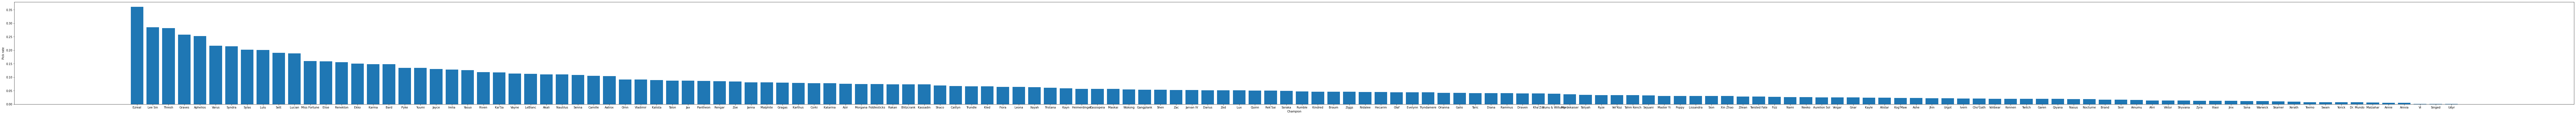

In [66]:
# Champion Pick Rate
sorted_champ=champion_pick.sort(key=lambda x:x[1],reverse=True)
champs=[champ for (champ,pick) in champion_pick]
picks=[pick for (champ,pick) in champion_pick]
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(125,5)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Pick rate')
ax.set_xlabel('Champion')
ax.bar(champs,picks)
plt.show()


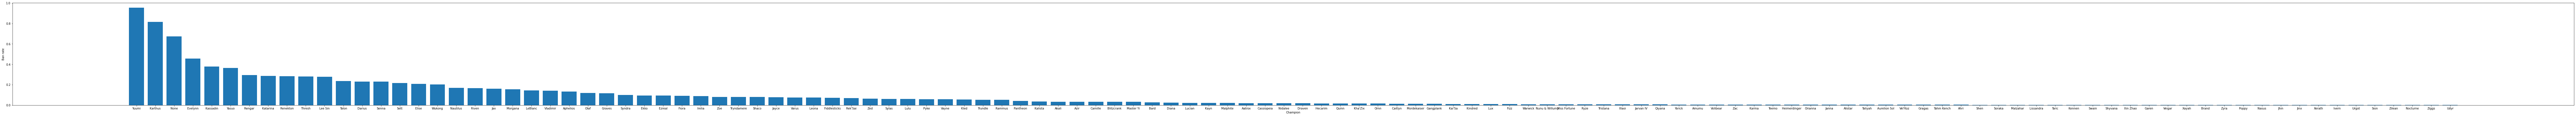

In [31]:
# Champion ban Rate
sorted_champ=champ_ban.sort(key=lambda x:x[1],reverse=True)
champs=[champ for (champ,ban) in champ_ban]
bans= [ban for (champ,ban) in champ_ban]
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(125,5)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Ban rate')
ax.set_xlabel('Champion')
ax.bar(champs,bans)
plt.show()



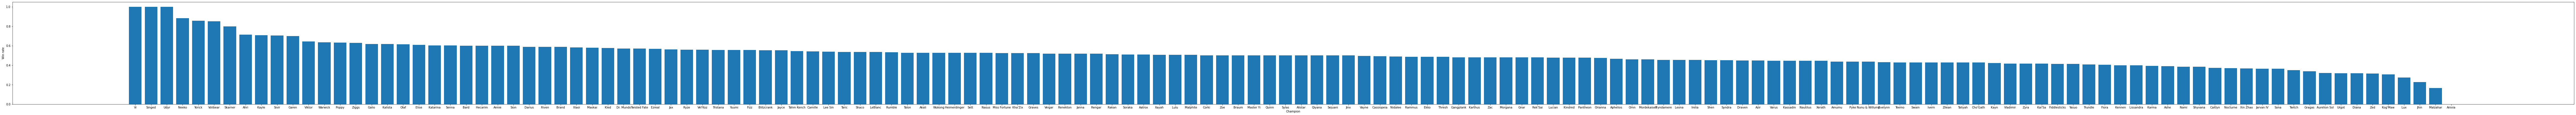

In [32]:
# Champion win Rate
sorted_champ=champ_win.sort(key=lambda x:x[1],reverse=True)
champs=[champ for (champ,win) in champ_win]
wins= [win for (champ,win) in champ_win]
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(125,5)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Win rate')
ax.set_xlabel('Champion')
ax.bar(champs,wins)
plt.show()



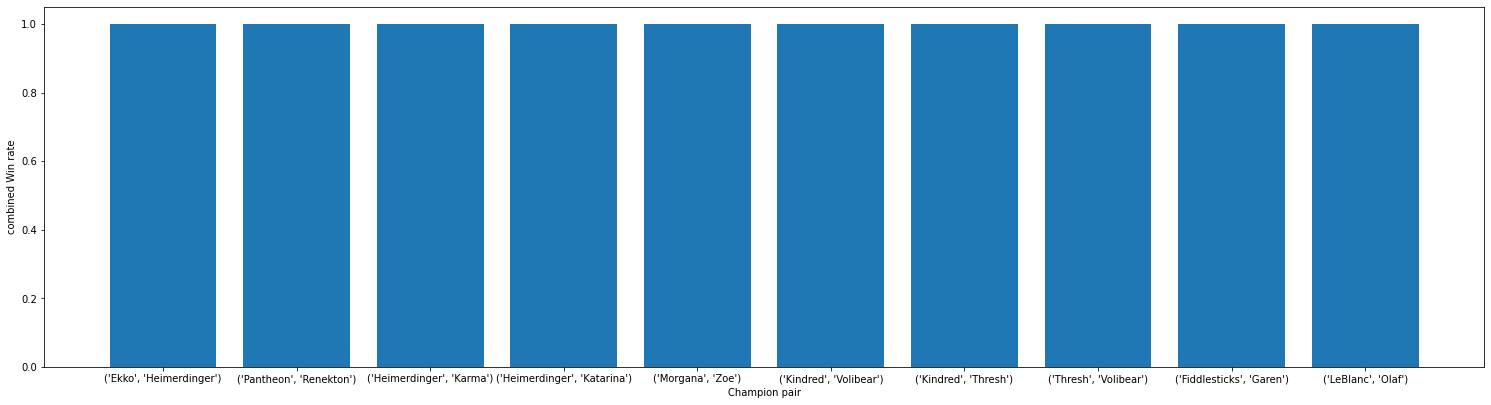

In [36]:
# champ_win_synergy
champ_win_synergy.sort(key=lambda x:x[1],reverse=True)
champ_pairs=[str(t) for (t,win) in champ_win_synergy]
pair_wins=[win for (t,win) in champ_win_synergy]
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('combined Win rate')
ax.set_xlabel('Champion pair')
ax.bar(champ_pairs[:10],pair_wins[:10])
plt.show()




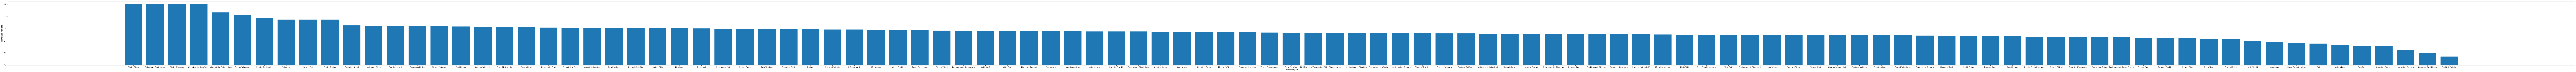

In [45]:
# item_win_rate
item_win.sort(key=lambda x:x[1],reverse=True)
champ_pairs=[t for (t,win) in item_win]
pair_wins=[win for (t,win) in item_win]
fig = plt.figure()
fig.set_size_inches(200,5)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel(' Win rate')
ax.set_xlabel('item')
ax.bar(champ_pairs,pair_wins)
plt.show()

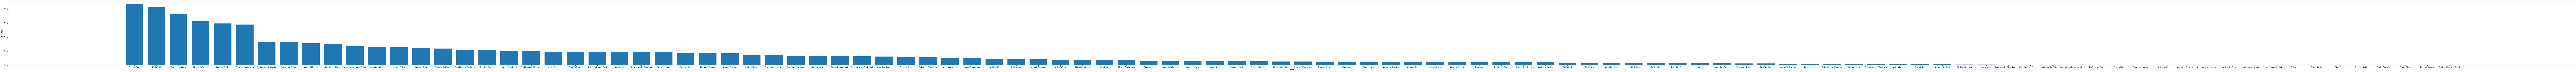

In [48]:
item_pick_rate
# item_pick_rate
item_pick_rate.sort(key=lambda x:x[1],reverse=True)
champ_pairs=[t for (t,win) in item_pick_rate]
pair_wins=[win for (t,win) in item_pick_rate]
fig = plt.figure()
fig.set_size_inches(200,5)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel(' pick rate')
ax.set_xlabel('item')
ax.bar(champ_pairs[1:],pair_wins[1:])
plt.show()

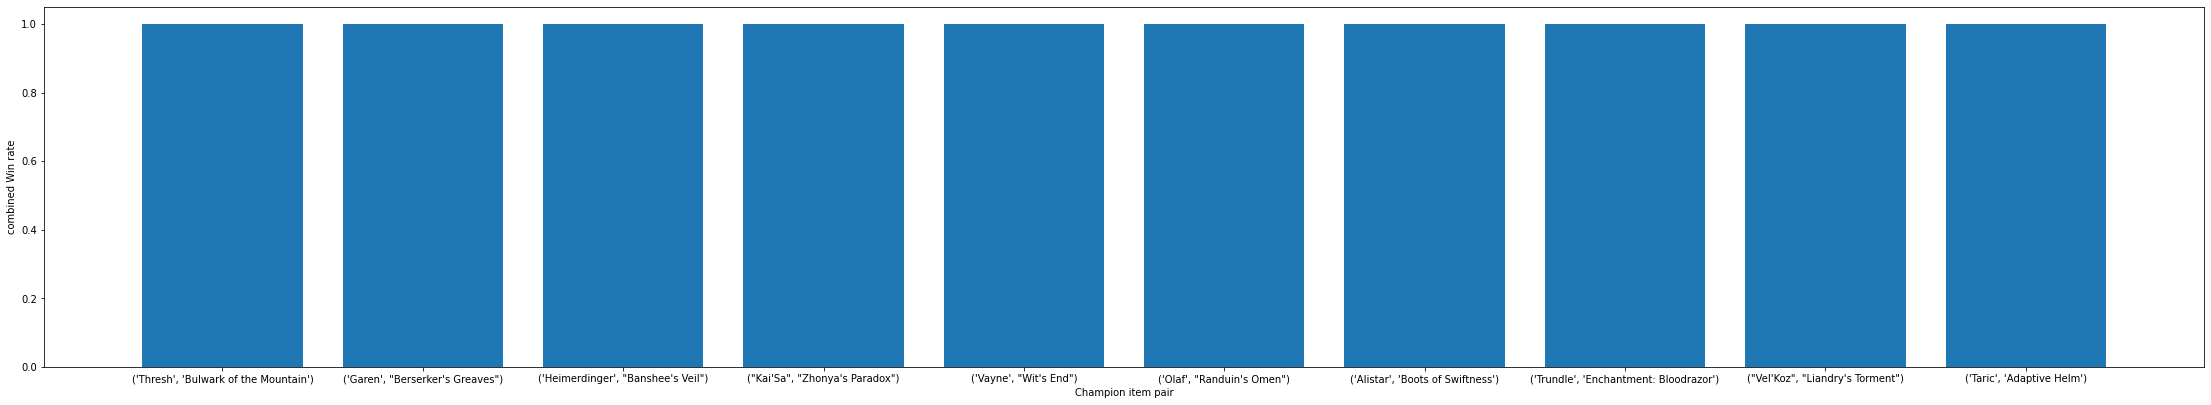

In [52]:
item_champ_synergyy
# champ_item_synergy
item_champ_synergyy.sort(key=lambda x:x[1],reverse=True)
champ_pairs=[str(t) for (t,win) in item_champ_synergyy]
pair_wins=[win for (t,win) in item_champ_synergyy]
fig = plt.figure()
fig.set_size_inches(30,5)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('combined Win rate')
ax.set_xlabel('Champion item pair')
ax.bar(champ_pairs[:10],pair_wins[:10])
plt.show()




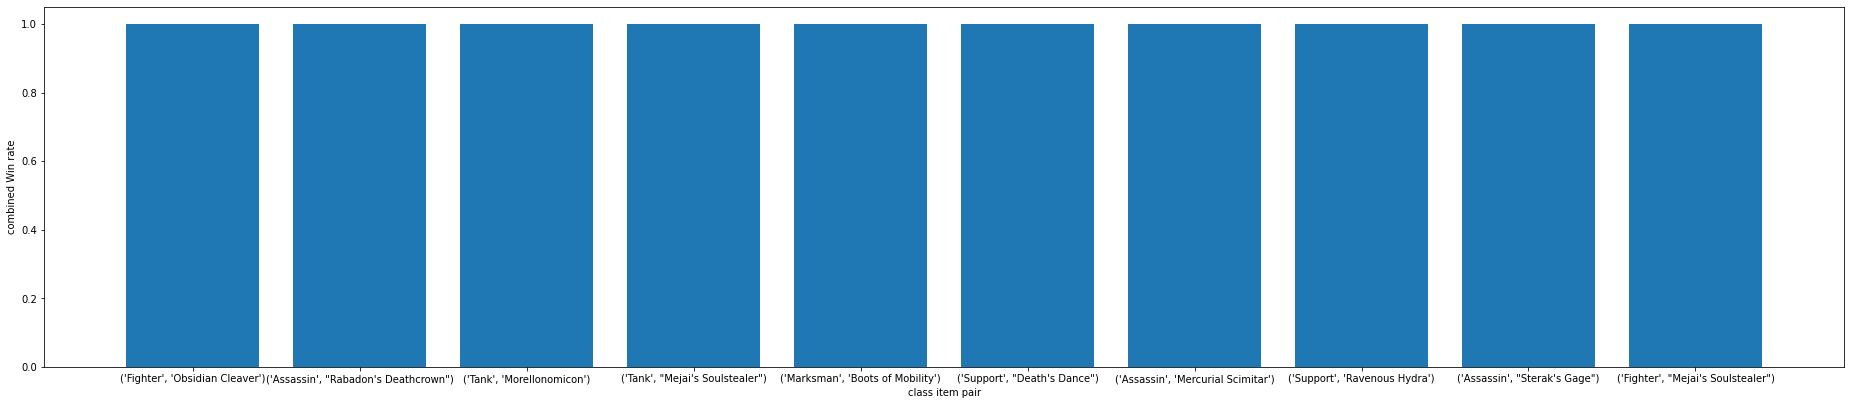

In [55]:
# item_class_synergyy
item_class_synergyy.sort(key=lambda x:x[1],reverse=True)
champ_pairs=[str(t) for (t,win) in item_class_synergyy]
pair_wins=[win for (t,win) in item_class_synergyy]
fig = plt.figure()
fig.set_size_inches(25,5)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('combined Win rate')
ax.set_xlabel('class item pair')
ax.bar(champ_pairs[:10],pair_wins[:10])
plt.show()

In [59]:
# item_champ_suggestionss
item_champ_suggestionss.sort(key=lambda x:x[0][0],reverse=False)
item_champ_suggestionss

[(('Aatrox',
   (("Berserker's Greaves",
     'Duskblade of Draktharr',
     'No item',
     'No item',
     'No item',
     'Sanguine Blade'),)),
  0.0),
 (('Aatrox',
   (('Control Ward',
     "Doran's Blade",
     'Ninja Tabi',
     'No item',
     'No item',
     'No item'),)),
  1.0),
 (('Aatrox',
   (("Athene's Unholy Grail",
     'Frostfang',
     'No item',
     'No item',
     'No item',
     'No item'),)),
  0.0),
 (('Aatrox',
   (("Death's Dance",
     'Ninja Tabi',
     'No item',
     'No item',
     'No item',
     'No item'),)),
  0.875),
 (('Aatrox',
   (("Berserker's Greaves",
     "Doran's Blade",
     'No item',
     'No item',
     'No item',
     'No item'),)),
  0.0),
 (('Aatrox',
   (("Archangel's Staff",
     'Corrupting Potion',
     'No item',
     'No item',
     'No item',
     'No item'),)),
  0.0),
 (('Aatrox',
   (("Berserker's Greaves",
     'No item',
     'No item',
     'No item',
     'Phantom Dancer',
     "Runaan's Hurricane"),)),
  0.0),
 (('Aatrox

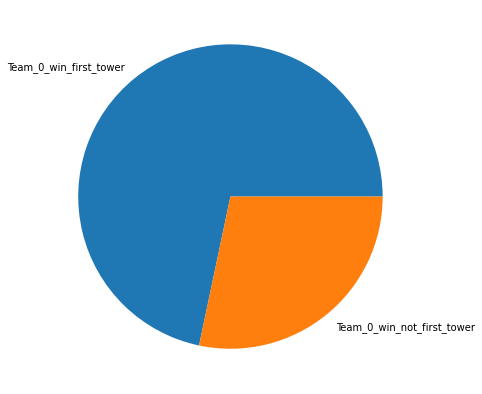

In [64]:
Teams=["Team_0_win_first_tower","Team_0_win_not_first_tower"]
win_rate=[0.7169421487603306,1-0.7169421487603306]
fig = plt.figure(figsize =(7, 7)) 
plt.pie(win_rate, labels = Teams) 
plt.show()

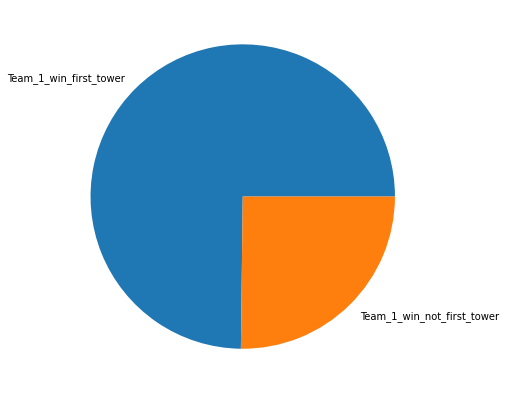

In [65]:
Teams=["Team_1_win_first_tower","Team_1_win_not_first_tower"]
win_rate=[0.748062015503876,1-0.748062015503876]
fig = plt.figure(figsize =(7, 7)) 
plt.pie(win_rate, labels = Teams) 
plt.show()

In [ ]:
name=get_champion_class("Akali")
name

In [ ]:
t=["Sivir","Talon","Garen","Zed","Akali"]
c = list(itertools.combinations(t, 2))
print(c)
c = [tuple(sorted(i)) for i in c]
print(c)

In [ ]:
s=len(lines.collect())
s

In [ ]:
L1=((1,2),(1,0))
# L2=[(4,5,6)]
# L3=L1+L2
# L3
L1[1][0]

In [ ]:
import gzip
!unzip -u "/content/league-of-legends-patch-109.zip"

In [ ]:
!pip install bigjson

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import bigjson
import json

with open('games100.json', 'rb') as f:
  j = json.load(f)
  print(j)

In [ ]:
vals=get_stats(j)
print(vals)

In [ ]:
lis=[1,2,3,4]
lis[1:4]

In [ ]:
name=j["participants"][0]["stats"]["item"+str(0)]["name"]
name

In [ ]:
dic={"item1":4325}
i=1
dic["item"+str(i)]

In [ ]:
dic1={"tags":[1,2]}
dic2={"tags":[1]}
#print(dic2['tags'][0])
lst=[]
lst==[]